In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading data
SC = pd.read_csv('C:/Users/User/Desktop/seungchon_2016-2023.csv', encoding='cp949')
JS = pd.read_csv('C:/Users/User/Desktop/juksan_2016-2023.csv', encoding='cp949')

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras import layers  #모듈(변수나 함수를 포함)만 불러오기
from sklearn.preprocessing import StandardScaler, MinMaxScaler  #표준 정규화, 최대-최소 정규화
from keras.layers import Dropout

In [5]:
# Load Chl-a, WT data
SC_Chla = pd.read_csv('C:/Users/User/Desktop/Chl-a, WT_seungchon_2016-2023.csv', encoding='cp949')
JS_Chla = pd.read_csv('C:/Users/User/Desktop/Chl-a, WT_juksan_2016-2023.csv', encoding='cp949')

In [6]:
SC_Chla.dropna(inplace=True)
JS_Chla.dropna(inplace=True)

In [7]:
print(SC_Chla.shape)
SC_Chla

(385, 30)


,Date,Chla,WT,y_t+1,Chla_t-12,WT_t-12,Chla_t-11,WT_t-11,Chla_t-10,WT_t-10,...,Chla_t-4,WT_t-4,Chla_t-3,WT_t-3,Chla_t-2,WT_t-2,Chla_t-1,WT_t-1,Chla_t-0,WT_t-0
12,2016.03.28,104.5,13.0,82.1,16.9,7.7,36.9,7.5,38.9,7.0,...,44.5,7.3,5.7,12.1,15.6,8.3,59.8,12.8,104.5,13.0
13,2016.04.04,82.1,15.7,107.0,36.9,7.5,38.9,7.0,21.2,4.2,...,5.7,12.1,15.6,8.3,59.8,12.8,104.5,13.0,82.1,15.7
14,2016.04.11,107.0,16.3,36.7,38.9,7.0,21.2,4.2,13.3,4.2,...,15.6,8.3,59.8,12.8,104.5,13.0,82.1,15.7,107.0,16.3
15,2016.04.18,36.7,16.2,31.2,21.2,4.2,13.3,4.2,14.7,6.3,...,59.8,12.8,104.5,13.0,82.1,15.7,107.0,16.3,36.7,16.2
16,2016.04.25,31.2,18.0,39.0,13.3,4.2,14.7,6.3,16.0,8.8,...,104.5,13.0,82.1,15.7,107.0,16.3,36.7,16.2,31.2,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2023.11.13,24.0,12.1,24.9,40.7,30.1,15.0,28.1,12.3,26.9,...,69.1,20.3,49.6,17.5,51.8,18.8,27.1,20.6,24.0,12.1
393,2023.11.20,24.9,10.9,31.2,15.0,28.1,12.3,26.9,31.3,27.5,...,49.6,17.5,51.8,18.8,27.1,20.6,24.0,12.1,24.9,10.9
394,2023.11.27,31.2,10.7,46.2,12.3,26.9,31.3,27.5,1.6,24.9,...,51.8,18.8,27.1,20.6,24.0,12.1,24.9,10.9,31.2,10.7
395,2023.12.04,46.2,9.4,70.7,31.3,27.5,1.6,24.9,2.3,23.1,...,27.1,20.6,24.0,12.1,24.9,10.9,31.2,10.7,46.2,9.4


In [8]:
print(JS_Chla.shape)
JS_Chla

(386, 30)


,Date,Chla,WT,y_t+1,Chla_t-12,WT_t-12,Chla_t-11,WT_t-11,Chla_t-10,WT_t-10,...,Chla_t-4,WT_t-4,Chla_t-3,WT_t-3,Chla_t-2,WT_t-2,Chla_t-1,WT_t-1,Chla_t-0,WT_t-0
12,2016.03.28,87.6,11.3,28.5,86.9,6.8,114.7,5.8,112.9,5.3,...,75.1,6.9,27.4,10.5,15.7,9.3,47.4,10.8,87.6,11.3
13,2016.04.04,28.5,14.7,17.8,114.7,5.8,112.9,5.3,116.6,3.2,...,27.4,10.5,15.7,9.3,47.4,10.8,87.6,11.3,28.5,14.7
14,2016.04.11,17.8,15.7,16.6,112.9,5.3,116.6,3.2,32.6,3.4,...,15.7,9.3,47.4,10.8,87.6,11.3,28.5,14.7,17.8,15.7
15,2016.04.18,16.6,16.9,61.5,116.6,3.2,32.6,3.4,66.8,4.9,...,47.4,10.8,87.6,11.3,28.5,14.7,17.8,15.7,16.6,16.9
16,2016.04.25,61.5,17.4,32.9,32.6,3.4,66.8,4.9,43.1,6.0,...,87.6,11.3,28.5,14.7,17.8,15.7,16.6,16.9,61.5,17.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,2023.11.13,16.1,14.1,13.7,24.1,30.1,17.2,27.7,38.1,26.5,...,25.3,20.2,24.1,18.3,28.8,18.0,21.0,19.2,16.1,14.1
394,2023.11.20,13.7,10.5,12.9,17.2,27.7,38.1,26.5,17.1,28.1,...,24.1,18.3,28.8,18.0,21.0,19.2,16.1,14.1,13.7,10.5
395,2023.11.27,12.9,9.6,8.3,38.1,26.5,17.1,28.1,2.7,24.7,...,28.8,18.0,21.0,19.2,16.1,14.1,13.7,10.5,12.9,9.6
396,2023.12.04,8.3,7.7,14.3,17.1,28.1,2.7,24.7,16.6,23.5,...,21.0,19.2,16.1,14.1,13.7,10.5,12.9,9.6,8.3,7.7


In [9]:
# SC (train vs test)
train_SC = SC_Chla[SC_Chla.index < 353]
test_SC = SC_Chla[SC_Chla.index >= 353]

In [10]:
train_SC

,Date,Chla,WT,y_t+1,Chla_t-12,WT_t-12,Chla_t-11,WT_t-11,Chla_t-10,WT_t-10,...,Chla_t-4,WT_t-4,Chla_t-3,WT_t-3,Chla_t-2,WT_t-2,Chla_t-1,WT_t-1,Chla_t-0,WT_t-0
12,2016.03.28,104.5,13.0,82.1,16.9,7.7,36.9,7.5,38.9,7.0,...,44.5,7.3,5.7,12.1,15.6,8.3,59.8,12.8,104.5,13.0
13,2016.04.04,82.1,15.7,107.0,36.9,7.5,38.9,7.0,21.2,4.2,...,5.7,12.1,15.6,8.3,59.8,12.8,104.5,13.0,82.1,15.7
14,2016.04.11,107.0,16.3,36.7,38.9,7.0,21.2,4.2,13.3,4.2,...,15.6,8.3,59.8,12.8,104.5,13.0,82.1,15.7,107.0,16.3
15,2016.04.18,36.7,16.2,31.2,21.2,4.2,13.3,4.2,14.7,6.3,...,59.8,12.8,104.5,13.0,82.1,15.7,107.0,16.3,36.7,16.2
16,2016.04.25,31.2,18.0,39.0,13.3,4.2,14.7,6.3,16.0,8.8,...,104.5,13.0,82.1,15.7,107.0,16.3,36.7,16.2,31.2,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,2022.11.14,18.5,16.6,17.2,26.4,28.6,80.7,25.9,48.7,26.1,...,61.3,20.8,60.1,17.8,28.4,17.7,22.3,14.2,18.5,16.6
349,2022.11.21,17.2,14.5,17.1,80.7,25.9,48.7,26.1,43.7,25.4,...,60.1,17.8,28.4,17.7,22.3,14.2,18.5,16.6,17.2,14.5
350,2022.11.28,17.1,13.7,11.4,48.7,26.1,43.7,25.4,48.8,27.0,...,28.4,17.7,22.3,14.2,18.5,16.6,17.2,14.5,17.1,13.7
351,2022.12.05,11.4,8.3,20.9,43.7,25.4,48.8,27.0,56.8,22.6,...,22.3,14.2,18.5,16.6,17.2,14.5,17.1,13.7,11.4,8.3


In [11]:
test_SC

,Date,Chla,WT,y_t+1,Chla_t-12,WT_t-12,Chla_t-11,WT_t-11,Chla_t-10,WT_t-10,...,Chla_t-4,WT_t-4,Chla_t-3,WT_t-3,Chla_t-2,WT_t-2,Chla_t-1,WT_t-1,Chla_t-0,WT_t-0
353,2023.01.09,48.7,6.9,62.5,56.8,22.6,17.6,22.1,31.7,19.1,...,17.2,14.5,17.1,13.7,11.4,8.3,20.9,8.8,48.7,6.9
354,2023.01.16,62.5,7.7,47.9,17.6,22.1,31.7,19.1,61.3,20.8,...,17.1,13.7,11.4,8.3,20.9,8.8,48.7,6.9,62.5,7.7
355,2023.01.30,47.9,5.2,55.5,31.7,19.1,61.3,20.8,60.1,17.8,...,11.4,8.3,20.9,8.8,48.7,6.9,62.5,7.7,47.9,5.2
356,2023.02.06,55.5,6.7,53.8,61.3,20.8,60.1,17.8,28.4,17.7,...,20.9,8.8,48.7,6.9,62.5,7.7,47.9,5.2,55.5,6.7
357,2023.02.13,53.8,8.4,59.0,60.1,17.8,28.4,17.7,22.3,14.2,...,48.7,6.9,62.5,7.7,47.9,5.2,55.5,6.7,53.8,8.4
358,2023.02.20,59.0,8.8,51.6,28.4,17.7,22.3,14.2,18.5,16.6,...,62.5,7.7,47.9,5.2,55.5,6.7,53.8,8.4,59.0,8.8
359,2023.02.27,51.6,9.1,68.6,22.3,14.2,18.5,16.6,17.2,14.5,...,47.9,5.2,55.5,6.7,53.8,8.4,59.0,8.8,51.6,9.1
360,2023.04.03,68.6,16.5,28.6,18.5,16.6,17.2,14.5,17.1,13.7,...,55.5,6.7,53.8,8.4,59.0,8.8,51.6,9.1,68.6,16.5
361,2023.04.10,28.6,14.8,67.6,17.2,14.5,17.1,13.7,11.4,8.3,...,53.8,8.4,59.0,8.8,51.6,9.1,68.6,16.5,28.6,14.8
362,2023.04.17,67.6,16.6,42.5,17.1,13.7,11.4,8.3,20.9,8.8,...,59.0,8.8,51.6,9.1,68.6,16.5,28.6,14.8,67.6,16.6


In [12]:
# JS (train vs test)
train_JS = JS_Chla[JS_Chla.index < 354]
test_JS = JS_Chla[JS_Chla.index >= 354]

In [13]:
train_JS

,Date,Chla,WT,y_t+1,Chla_t-12,WT_t-12,Chla_t-11,WT_t-11,Chla_t-10,WT_t-10,...,Chla_t-4,WT_t-4,Chla_t-3,WT_t-3,Chla_t-2,WT_t-2,Chla_t-1,WT_t-1,Chla_t-0,WT_t-0
12,2016.03.28,87.6,11.3,28.5,86.9,6.8,114.7,5.8,112.9,5.3,...,75.1,6.9,27.4,10.5,15.7,9.3,47.4,10.8,87.6,11.3
13,2016.04.04,28.5,14.7,17.8,114.7,5.8,112.9,5.3,116.6,3.2,...,27.4,10.5,15.7,9.3,47.4,10.8,87.6,11.3,28.5,14.7
14,2016.04.11,17.8,15.7,16.6,112.9,5.3,116.6,3.2,32.6,3.4,...,15.7,9.3,47.4,10.8,87.6,11.3,28.5,14.7,17.8,15.7
15,2016.04.18,16.6,16.9,61.5,116.6,3.2,32.6,3.4,66.8,4.9,...,47.4,10.8,87.6,11.3,28.5,14.7,17.8,15.7,16.6,16.9
16,2016.04.25,61.5,17.4,32.9,32.6,3.4,66.8,4.9,43.1,6.0,...,87.6,11.3,28.5,14.7,17.8,15.7,16.6,16.9,61.5,17.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,2022.11.14,20.8,14.8,15.5,53.0,28.8,43.8,27.4,34.7,25.6,...,33.1,19.3,19.6,17.3,22.6,16.7,13.4,14.2,20.8,14.8
350,2022.11.21,15.5,13.6,17.9,43.8,27.4,34.7,25.6,29.5,24.9,...,19.6,17.3,22.6,16.7,13.4,14.2,20.8,14.8,15.5,13.6
351,2022.11.28,17.9,12.7,23.9,34.7,25.6,29.5,24.9,47.9,26.9,...,22.6,16.7,13.4,14.2,20.8,14.8,15.5,13.6,17.9,12.7
352,2022.12.05,23.9,8.6,38.3,29.5,24.9,47.9,26.9,43.7,23.6,...,13.4,14.2,20.8,14.8,15.5,13.6,17.9,12.7,23.9,8.6


In [14]:
test_JS

,Date,Chla,WT,y_t+1,Chla_t-12,WT_t-12,Chla_t-11,WT_t-11,Chla_t-10,WT_t-10,...,Chla_t-4,WT_t-4,Chla_t-3,WT_t-3,Chla_t-2,WT_t-2,Chla_t-1,WT_t-1,Chla_t-0,WT_t-0
354,2023.01.09,47.0,4.4,37.4,43.7,23.6,40.4,23.1,40.9,19.6,...,15.5,13.6,17.9,12.7,23.9,8.6,38.3,7.3,47.0,4.4
355,2023.01.16,37.4,6.8,53.2,40.4,23.1,40.9,19.6,33.1,19.3,...,17.9,12.7,23.9,8.6,38.3,7.3,47.0,4.4,37.4,6.8
356,2023.01.30,53.2,3.3,42.4,40.9,19.6,33.1,19.3,19.6,17.3,...,23.9,8.6,38.3,7.3,47.0,4.4,37.4,6.8,53.2,3.3
357,2023.02.06,42.4,4.3,26.7,33.1,19.3,19.6,17.3,22.6,16.7,...,38.3,7.3,47.0,4.4,37.4,6.8,53.2,3.3,42.4,4.3
358,2023.02.13,26.7,6.2,18.0,19.6,17.3,22.6,16.7,13.4,14.2,...,47.0,4.4,37.4,6.8,53.2,3.3,42.4,4.3,26.7,6.2
359,2023.02.20,18.0,6.8,11.3,22.6,16.7,13.4,14.2,20.8,14.8,...,37.4,6.8,53.2,3.3,42.4,4.3,26.7,6.2,18.0,6.8
360,2023.02.27,11.3,7.2,115.7,13.4,14.2,20.8,14.8,15.5,13.6,...,53.2,3.3,42.4,4.3,26.7,6.2,18.0,6.8,11.3,7.2
361,2023.04.03,115.7,14.7,29.1,20.8,14.8,15.5,13.6,17.9,12.7,...,42.4,4.3,26.7,6.2,18.0,6.8,11.3,7.2,115.7,14.7
362,2023.04.10,29.1,15.1,34.2,15.5,13.6,17.9,12.7,23.9,8.6,...,26.7,6.2,18.0,6.8,11.3,7.2,115.7,14.7,29.1,15.1
363,2023.04.17,34.2,15.7,34.8,17.9,12.7,23.9,8.6,38.3,7.3,...,18.0,6.8,11.3,7.2,115.7,14.7,29.1,15.1,34.2,15.7


In [15]:
# train vs test
X_train_SC = train_SC.loc[:, 'Chla_t-12':'WT_t-0']
y_train_SC = train_SC['y_t+1']

X_test_SC = test_SC.loc[:, 'Chla_t-12':'WT_t-0']
y_test_SC = test_SC['y_t+1']

X_train_JS = train_JS.loc[:, 'Chla_t-12':'WT_t-0']
y_train_JS = train_JS['y_t+1']

X_test_JS = test_JS.loc[:, 'Chla_t-12':'WT_t-0']
y_test_JS = test_JS['y_t+1']

print(X_train_SC.shape, y_train_SC.shape)
print(X_test_SC.shape, y_test_SC.shape)
print(X_train_JS.shape, y_train_JS.shape)
print(X_test_JS.shape, y_test_JS.shape)

(341, 26) (341,)
(44, 26) (44,)
(342, 26) (342,)
(44, 26) (44,)


In [16]:
# 이 셀을 두 번 실행시키면 values가 없다고 뜬다. 그럴 때는 위부터 다시 실행하고 오면 된다.
# 총 13번의 순환 동안 2개씩 입력이 들어가게 된다.
X_train_SC = X_train_SC.values.reshape(341,13,2)
X_test_SC = X_test_SC.values.reshape(44,13,2)
X_train_JS = X_train_JS.values.reshape(342,13,2)
X_test_JS = X_test_JS.values.reshape(44,13,2)

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU

# RNN

In [18]:
# RNN model (SC)
model = Sequential()
# time_steps는 과거 5개의 데이터를 토대로 미래를 맞춘다.
# features는 Chl-a 하나만 예측하므로 1개이다.
model.add(SimpleRNN(1024, input_shape=(13, 2), return_sequences=False))
model.add(layers.Activation('tanh'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='Adam', metrics=["mean_squared_error","mean_absolute_error"])

history = model.fit(X_train_SC, y_train_SC, validation_split=0.2, epochs=100, verbose=2)

Epoch 1/100
9/9 - 1s - loss: 3486.5083 - mean_squared_error: 3486.5083 - mean_absolute_error: 43.2588 - val_loss: 1965.6803 - val_mean_squared_error: 1965.6803 - val_mean_absolute_error: 33.3193 - 902ms/epoch - 100ms/step
Epoch 2/100
9/9 - 0s - loss: 2375.6082 - mean_squared_error: 2375.6082 - mean_absolute_error: 33.8561 - val_loss: 1629.4541 - val_mean_squared_error: 1629.4541 - val_mean_absolute_error: 30.9394 - 289ms/epoch - 32ms/step
Epoch 3/100
9/9 - 0s - loss: 2061.0015 - mean_squared_error: 2061.0015 - mean_absolute_error: 31.5442 - val_loss: 1426.3717 - val_mean_squared_error: 1426.3717 - val_mean_absolute_error: 29.5732 - 283ms/epoch - 31ms/step
Epoch 4/100
9/9 - 0s - loss: 1862.9856 - mean_squared_error: 1862.9856 - mean_absolute_error: 30.0268 - val_loss: 1301.4335 - val_mean_squared_error: 1301.4336 - val_mean_absolute_error: 28.5948 - 280ms/epoch - 31ms/step
Epoch 5/100
9/9 - 0s - loss: 1763.8849 - mean_squared_error: 1763.8849 - mean_absolute_error: 29.5370 - val_loss: 1

Epoch 38/100
9/9 - 0s - loss: 1306.2234 - mean_squared_error: 1306.2234 - mean_absolute_error: 26.5443 - val_loss: 1149.3807 - val_mean_squared_error: 1149.3807 - val_mean_absolute_error: 27.1537 - 282ms/epoch - 31ms/step
Epoch 39/100
9/9 - 0s - loss: 1291.9369 - mean_squared_error: 1291.9369 - mean_absolute_error: 26.7563 - val_loss: 1148.1130 - val_mean_squared_error: 1148.1130 - val_mean_absolute_error: 27.1337 - 281ms/epoch - 31ms/step
Epoch 40/100
9/9 - 0s - loss: 1265.0764 - mean_squared_error: 1265.0764 - mean_absolute_error: 26.0111 - val_loss: 1154.4104 - val_mean_squared_error: 1154.4104 - val_mean_absolute_error: 26.9735 - 281ms/epoch - 31ms/step
Epoch 41/100
9/9 - 0s - loss: 1274.6643 - mean_squared_error: 1274.6643 - mean_absolute_error: 25.8861 - val_loss: 1162.9183 - val_mean_squared_error: 1162.9183 - val_mean_absolute_error: 27.0920 - 274ms/epoch - 30ms/step
Epoch 42/100
9/9 - 0s - loss: 1264.5767 - mean_squared_error: 1264.5767 - mean_absolute_error: 26.3797 - val_los

Epoch 75/100
9/9 - 0s - loss: 1175.7035 - mean_squared_error: 1175.7035 - mean_absolute_error: 25.3300 - val_loss: 1226.2803 - val_mean_squared_error: 1226.2803 - val_mean_absolute_error: 27.3301 - 291ms/epoch - 32ms/step
Epoch 76/100
9/9 - 0s - loss: 1163.2465 - mean_squared_error: 1163.2465 - mean_absolute_error: 25.2366 - val_loss: 1225.4642 - val_mean_squared_error: 1225.4642 - val_mean_absolute_error: 27.4127 - 293ms/epoch - 33ms/step
Epoch 77/100
9/9 - 0s - loss: 1160.1187 - mean_squared_error: 1160.1187 - mean_absolute_error: 25.3075 - val_loss: 1240.1941 - val_mean_squared_error: 1240.1941 - val_mean_absolute_error: 27.5653 - 293ms/epoch - 33ms/step
Epoch 78/100
9/9 - 0s - loss: 1153.9178 - mean_squared_error: 1153.9178 - mean_absolute_error: 25.2002 - val_loss: 1242.3345 - val_mean_squared_error: 1242.3345 - val_mean_absolute_error: 27.6751 - 294ms/epoch - 33ms/step
Epoch 79/100
9/9 - 0s - loss: 1172.8016 - mean_squared_error: 1172.8016 - mean_absolute_error: 25.2919 - val_los

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1024)              1051648   
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 1)                 1025      
                                                                 
Total params: 1052673 (4.02 MB)
Trainable params: 1052673 (4.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
scores = model.evaluate(X_test_SC, y_test_SC)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 6ms/step - loss: 562.9241 - mean_squared_error: 562.9241 - mean_absolute_error: 19.7100
test_loss:  562.924072265625
test_mae:  562.924072265625


In [21]:
SC_test_y_pred_RNN = model.predict(X_test_SC)
SC_test_y_pred_RNN

2/2 [==============================] - 0s 5ms/step


array([[53.636898],
       [54.300903],
       [49.550076],
       [52.679348],
       [50.884953],
       [52.61492 ],
       [50.019165],
       [53.360676],
       [44.827175],
       [51.44551 ],
       [47.284077],
       [54.790573],
       [39.97063 ],
       [43.7449  ],
       [45.940197],
       [35.980053],
       [53.028244],
       [44.154   ],
       [38.362762],
       [34.644146],
       [34.09168 ],
       [34.084885],
       [34.4622  ],
       [34.16032 ],
       [42.40291 ],
       [48.57383 ],
       [48.58408 ],
       [44.15432 ],
       [36.346306],
       [34.7514  ],
       [40.56886 ],
       [35.19551 ],
       [33.964497],
       [35.112354],
       [52.099697],
       [52.93498 ],
       [48.398823],
       [48.8495  ],
       [44.213333],
       [42.597103],
       [45.24841 ],
       [47.33426 ],
       [50.27524 ],
       [55.82616 ]], dtype=float32)

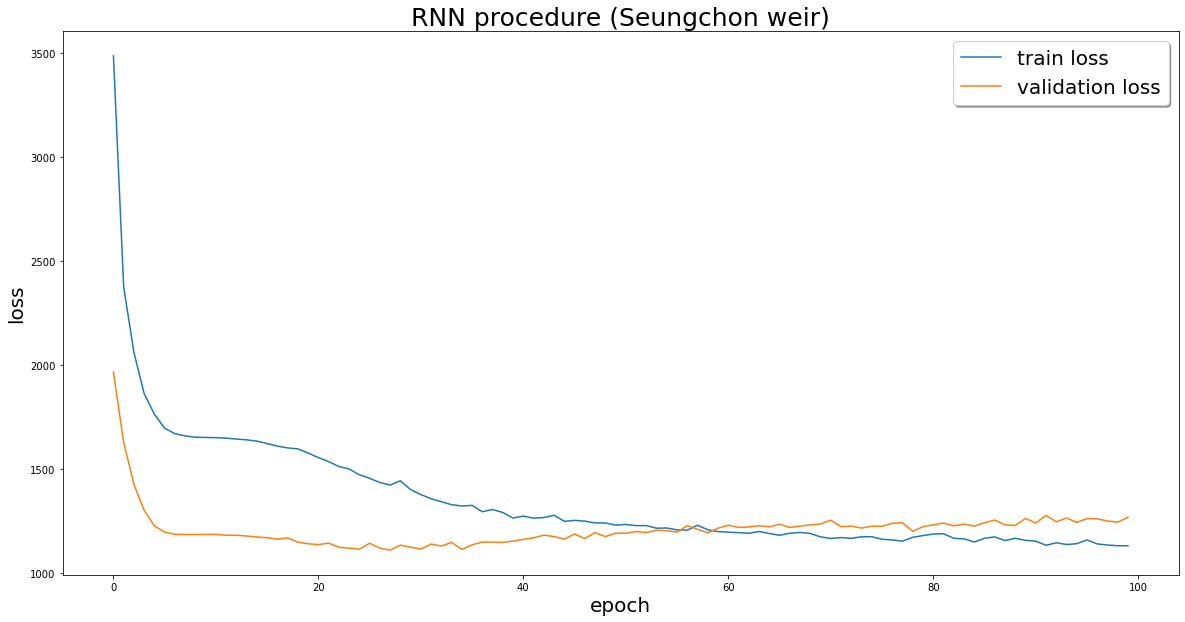

In [22]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), history.history['loss'], label='train loss')
plt.plot(range(100), history.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('RNN procedure (Seungchon weir)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('RNN SC_python.png')

In [23]:
# RNN model (JS)
model = Sequential()
# time_steps는 과거 5개의 데이터를 토대로 미래를 맞춘다.
# features는 Chl-a 하나만 예측하므로 1개이다.
model.add(SimpleRNN(1024, input_shape=(13, 2), return_sequences=False))
model.add(layers.Activation('tanh'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='Adam', metrics=["mean_squared_error","mean_absolute_error"])

history = model.fit(X_train_JS, y_train_JS, validation_split=0.2, epochs=100, verbose=2)

Epoch 1/100
9/9 - 1s - loss: 3545.8972 - mean_squared_error: 3545.8972 - mean_absolute_error: 40.9377 - val_loss: 1231.4023 - val_mean_squared_error: 1231.4023 - val_mean_absolute_error: 24.4308 - 743ms/epoch - 83ms/step
Epoch 2/100
9/9 - 0s - loss: 2482.1636 - mean_squared_error: 2482.1636 - mean_absolute_error: 32.9062 - val_loss: 1011.2708 - val_mean_squared_error: 1011.2708 - val_mean_absolute_error: 21.9696 - 275ms/epoch - 31ms/step
Epoch 3/100
9/9 - 0s - loss: 2212.3374 - mean_squared_error: 2212.3374 - mean_absolute_error: 31.3182 - val_loss: 897.5453 - val_mean_squared_error: 897.5453 - val_mean_absolute_error: 21.3432 - 285ms/epoch - 32ms/step
Epoch 4/100
9/9 - 0s - loss: 2029.8002 - mean_squared_error: 2029.8002 - mean_absolute_error: 30.4604 - val_loss: 848.0497 - val_mean_squared_error: 848.0497 - val_mean_absolute_error: 21.5319 - 284ms/epoch - 32ms/step
Epoch 5/100
9/9 - 0s - loss: 1941.6440 - mean_squared_error: 1941.6440 - mean_absolute_error: 30.3734 - val_loss: 839.26

Epoch 39/100
9/9 - 0s - loss: 1154.2936 - mean_squared_error: 1154.2936 - mean_absolute_error: 24.9181 - val_loss: 803.8922 - val_mean_squared_error: 803.8922 - val_mean_absolute_error: 21.0105 - 280ms/epoch - 31ms/step
Epoch 40/100
9/9 - 0s - loss: 1163.3076 - mean_squared_error: 1163.3076 - mean_absolute_error: 25.8493 - val_loss: 771.6913 - val_mean_squared_error: 771.6913 - val_mean_absolute_error: 21.0944 - 284ms/epoch - 32ms/step
Epoch 41/100
9/9 - 0s - loss: 1135.9066 - mean_squared_error: 1135.9066 - mean_absolute_error: 25.2480 - val_loss: 824.2660 - val_mean_squared_error: 824.2660 - val_mean_absolute_error: 21.2426 - 296ms/epoch - 33ms/step
Epoch 42/100
9/9 - 0s - loss: 1124.4354 - mean_squared_error: 1124.4354 - mean_absolute_error: 25.4811 - val_loss: 779.8255 - val_mean_squared_error: 779.8255 - val_mean_absolute_error: 20.7323 - 295ms/epoch - 33ms/step
Epoch 43/100
9/9 - 0s - loss: 1106.6829 - mean_squared_error: 1106.6829 - mean_absolute_error: 24.9821 - val_loss: 766.4

Epoch 77/100
9/9 - 0s - loss: 969.8908 - mean_squared_error: 969.8908 - mean_absolute_error: 23.6581 - val_loss: 776.7577 - val_mean_squared_error: 776.7577 - val_mean_absolute_error: 20.6503 - 294ms/epoch - 33ms/step
Epoch 78/100
9/9 - 0s - loss: 952.8825 - mean_squared_error: 952.8825 - mean_absolute_error: 23.4315 - val_loss: 725.6340 - val_mean_squared_error: 725.6340 - val_mean_absolute_error: 19.8852 - 305ms/epoch - 34ms/step
Epoch 79/100
9/9 - 0s - loss: 998.4879 - mean_squared_error: 998.4879 - mean_absolute_error: 23.6542 - val_loss: 811.1498 - val_mean_squared_error: 811.1498 - val_mean_absolute_error: 21.0249 - 301ms/epoch - 33ms/step
Epoch 80/100
9/9 - 0s - loss: 1004.5106 - mean_squared_error: 1004.5106 - mean_absolute_error: 24.5896 - val_loss: 805.1928 - val_mean_squared_error: 805.1928 - val_mean_absolute_error: 20.8520 - 293ms/epoch - 33ms/step
Epoch 81/100
9/9 - 0s - loss: 1008.0952 - mean_squared_error: 1008.0952 - mean_absolute_error: 23.9064 - val_loss: 681.5383 - 

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 1024)              1051648   
                                                                 
 activation_1 (Activation)   (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 1052673 (4.02 MB)
Trainable params: 1052673 (4.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
scores = model.evaluate(X_test_JS, y_test_JS)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 6ms/step - loss: 466.6880 - mean_squared_error: 466.6880 - mean_absolute_error: 17.0487
test_loss:  466.68798828125
test_mae:  466.68798828125


In [26]:
JS_test_y_pred_RNN = model.predict(X_test_JS)
JS_test_y_pred_RNN

2/2 [==============================] - 0s 5ms/step


array([[54.61926 ],
       [58.119232],
       [60.36423 ],
       [50.565002],
       [36.00056 ],
       [29.91689 ],
       [31.258396],
       [65.33428 ],
       [63.887527],
       [43.60131 ],
       [32.111458],
       [30.293488],
       [29.393463],
       [35.134342],
       [35.859592],
       [31.077484],
       [36.290348],
       [39.073437],
       [34.42393 ],
       [36.23618 ],
       [30.219942],
       [27.31049 ],
       [27.966553],
       [27.999699],
       [29.318783],
       [30.983566],
       [31.862537],
       [30.605864],
       [29.147533],
       [33.010067],
       [30.81628 ],
       [27.750637],
       [29.119888],
       [28.953259],
       [30.65533 ],
       [32.194332],
       [32.70357 ],
       [33.700504],
       [32.5302  ],
       [31.12765 ],
       [30.978048],
       [31.272854],
       [31.024832],
       [31.447676]], dtype=float32)

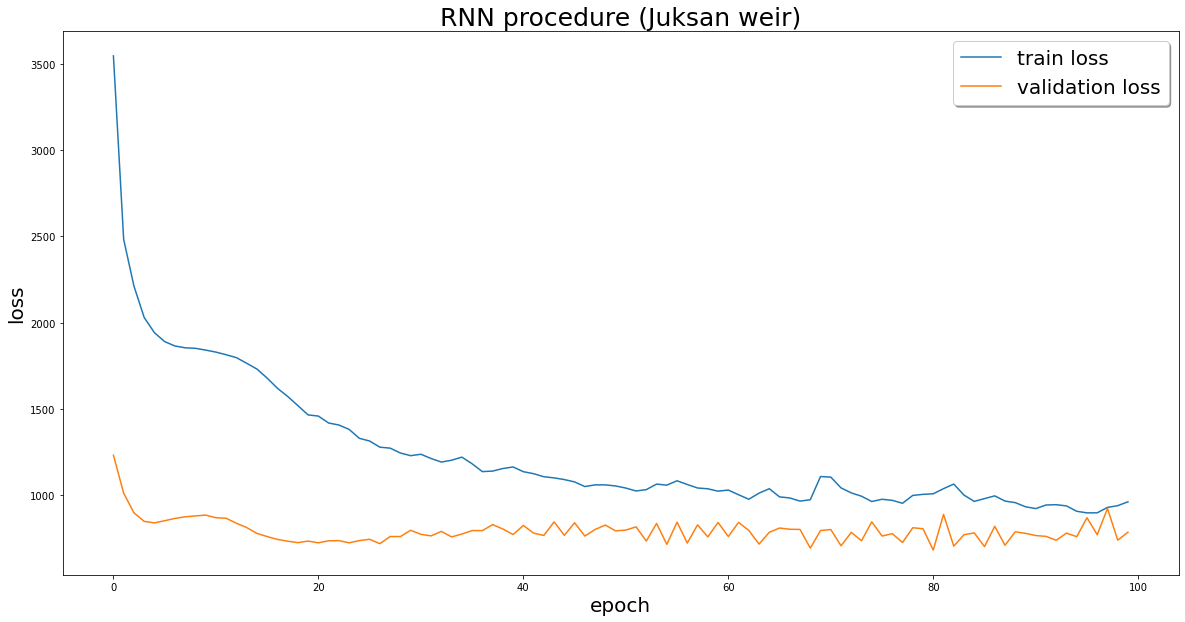

In [27]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), history.history['loss'], label='train loss')
plt.plot(range(100), history.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('RNN procedure (Juksan weir)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('RNN JS_python.png')

# LSTM

In [28]:
# LSTM model (SC)
model = Sequential()
# time_steps는 과거 5개의 데이터를 토대로 미래를 맞춘다.
# features는 Chl-a 하나만 예측하므로 1개이다.
model.add(LSTM(1024, input_shape=(13, 2), return_sequences=False))
model.add(layers.Activation('tanh'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='Adam', metrics=["mean_squared_error","mean_absolute_error"])

history = model.fit(X_train_SC, y_train_SC, validation_split=0.2, epochs=100, verbose=2)

Epoch 1/100
9/9 - 2s - loss: 3625.8286 - mean_squared_error: 3625.8286 - mean_absolute_error: 44.7202 - val_loss: 2169.7322 - val_mean_squared_error: 2169.7322 - val_mean_absolute_error: 34.9031 - 2s/epoch - 224ms/step
Epoch 2/100
9/9 - 1s - loss: 2518.3596 - mean_squared_error: 2518.3596 - mean_absolute_error: 35.1909 - val_loss: 1706.7526 - val_mean_squared_error: 1706.7526 - val_mean_absolute_error: 31.4406 - 995ms/epoch - 111ms/step
Epoch 3/100
9/9 - 1s - loss: 2113.4797 - mean_squared_error: 2113.4797 - mean_absolute_error: 31.8521 - val_loss: 1444.1235 - val_mean_squared_error: 1444.1235 - val_mean_absolute_error: 29.6960 - 1s/epoch - 114ms/step
Epoch 4/100
9/9 - 1s - loss: 1889.1012 - mean_squared_error: 1889.1012 - mean_absolute_error: 30.3828 - val_loss: 1296.1205 - val_mean_squared_error: 1296.1205 - val_mean_absolute_error: 28.5548 - 995ms/epoch - 111ms/step
Epoch 5/100
9/9 - 1s - loss: 1750.5270 - mean_squared_error: 1750.5270 - mean_absolute_error: 29.4979 - val_loss: 1229

9/9 - 1s - loss: 1319.3245 - mean_squared_error: 1319.3245 - mean_absolute_error: 26.6481 - val_loss: 1102.8767 - val_mean_squared_error: 1102.8767 - val_mean_absolute_error: 26.3599 - 997ms/epoch - 111ms/step
Epoch 39/100
9/9 - 1s - loss: 1303.7037 - mean_squared_error: 1303.7037 - mean_absolute_error: 26.4424 - val_loss: 1134.8925 - val_mean_squared_error: 1134.8925 - val_mean_absolute_error: 27.2407 - 995ms/epoch - 111ms/step
Epoch 40/100
9/9 - 1s - loss: 1301.7651 - mean_squared_error: 1301.7651 - mean_absolute_error: 26.4112 - val_loss: 1128.0123 - val_mean_squared_error: 1128.0123 - val_mean_absolute_error: 26.9983 - 1s/epoch - 112ms/step
Epoch 41/100
9/9 - 1s - loss: 1286.0795 - mean_squared_error: 1286.0795 - mean_absolute_error: 26.4519 - val_loss: 1138.1360 - val_mean_squared_error: 1138.1360 - val_mean_absolute_error: 27.1478 - 1s/epoch - 113ms/step
Epoch 42/100
9/9 - 1s - loss: 1277.7008 - mean_squared_error: 1277.7008 - mean_absolute_error: 26.3401 - val_loss: 1143.8546 - 

Epoch 75/100
9/9 - 1s - loss: 1151.0500 - mean_squared_error: 1151.0500 - mean_absolute_error: 25.5101 - val_loss: 1155.1754 - val_mean_squared_error: 1155.1754 - val_mean_absolute_error: 26.8370 - 1s/epoch - 112ms/step
Epoch 76/100
9/9 - 1s - loss: 1178.5656 - mean_squared_error: 1178.5656 - mean_absolute_error: 25.4405 - val_loss: 1162.1820 - val_mean_squared_error: 1162.1820 - val_mean_absolute_error: 26.7473 - 993ms/epoch - 110ms/step
Epoch 77/100
9/9 - 1s - loss: 1136.3252 - mean_squared_error: 1136.3252 - mean_absolute_error: 25.0221 - val_loss: 1196.4664 - val_mean_squared_error: 1196.4664 - val_mean_absolute_error: 27.5250 - 991ms/epoch - 110ms/step
Epoch 78/100
9/9 - 1s - loss: 1115.3350 - mean_squared_error: 1115.3350 - mean_absolute_error: 24.5740 - val_loss: 1260.4650 - val_mean_squared_error: 1260.4650 - val_mean_absolute_error: 27.8426 - 1s/epoch - 113ms/step
Epoch 79/100
9/9 - 1s - loss: 1082.6006 - mean_squared_error: 1082.6006 - mean_absolute_error: 24.5832 - val_loss:

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1024)              4206592   
                                                                 
 activation_2 (Activation)   (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 4207617 (16.05 MB)
Trainable params: 4207617 (16.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
scores = model.evaluate(X_test_SC, y_test_SC)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 9ms/step - loss: 593.7702 - mean_squared_error: 593.7702 - mean_absolute_error: 19.8550
test_loss:  593.7702026367188
test_mae:  593.7702026367188


In [31]:
SC_test_y_pred_LSTM = model.predict(X_test_SC)
SC_test_y_pred_LSTM

2/2 [==============================] - 0s 8ms/step


array([[52.500523],
       [39.09109 ],
       [44.792458],
       [47.47655 ],
       [51.41408 ],
       [50.50104 ],
       [47.600697],
       [47.346973],
       [40.158276],
       [42.657524],
       [42.74982 ],
       [55.887157],
       [42.87836 ],
       [41.01853 ],
       [41.623013],
       [43.517887],
       [49.37595 ],
       [43.022167],
       [34.61376 ],
       [28.623077],
       [39.825474],
       [39.825405],
       [32.38706 ],
       [25.747295],
       [48.999897],
       [43.344402],
       [38.47833 ],
       [32.79673 ],
       [25.34239 ],
       [23.235256],
       [54.439808],
       [35.379597],
       [18.315964],
       [29.152458],
       [99.63569 ],
       [66.38564 ],
       [42.870647],
       [37.58457 ],
       [33.66679 ],
       [33.95484 ],
       [51.414673],
       [40.1283  ],
       [35.81738 ],
       [58.25313 ]], dtype=float32)

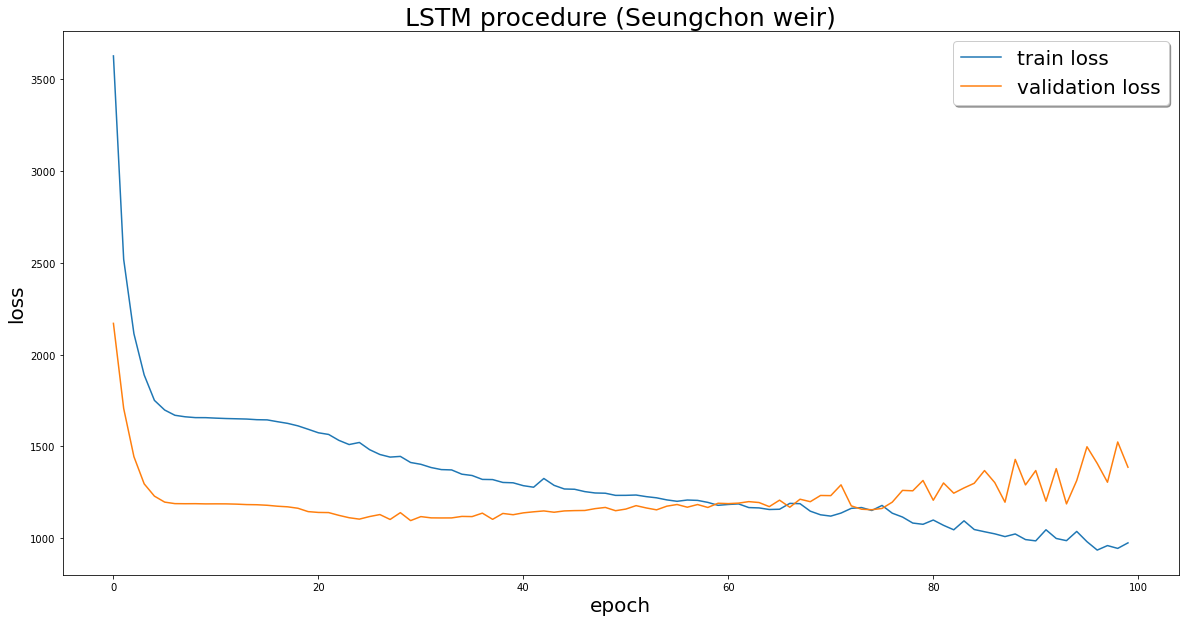

In [32]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), history.history['loss'], label='train loss')
plt.plot(range(100), history.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('LSTM procedure (Seungchon weir)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('LSTM SC_python.png')

In [33]:
# LSTM model (JS)
model = Sequential()
# time_steps는 과거 5개의 데이터를 토대로 미래를 맞춘다.
# features는 Chl-a 하나만 예측하므로 1개이다.
model.add(LSTM(1024, input_shape=(13, 2), return_sequences=False))
model.add(layers.Activation('tanh'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='Adam', metrics=["mean_squared_error","mean_absolute_error"])

history = model.fit(X_train_JS, y_train_JS, validation_split=0.2, epochs=100, verbose=2)

Epoch 1/100
9/9 - 2s - loss: 3468.9832 - mean_squared_error: 3468.9832 - mean_absolute_error: 41.3951 - val_loss: 1306.8687 - val_mean_squared_error: 1306.8687 - val_mean_absolute_error: 25.3436 - 2s/epoch - 221ms/step
Epoch 2/100
9/9 - 1s - loss: 2526.3777 - mean_squared_error: 2526.3777 - mean_absolute_error: 33.3133 - val_loss: 1014.4659 - val_mean_squared_error: 1014.4659 - val_mean_absolute_error: 22.0073 - 970ms/epoch - 108ms/step
Epoch 3/100
9/9 - 1s - loss: 2193.3076 - mean_squared_error: 2193.3076 - mean_absolute_error: 31.1904 - val_loss: 888.2301 - val_mean_squared_error: 888.2301 - val_mean_absolute_error: 21.3444 - 975ms/epoch - 108ms/step
Epoch 4/100
9/9 - 1s - loss: 2004.6014 - mean_squared_error: 2004.6014 - mean_absolute_error: 30.2975 - val_loss: 843.5934 - val_mean_squared_error: 843.5934 - val_mean_absolute_error: 21.7228 - 957ms/epoch - 106ms/step
Epoch 5/100
9/9 - 1s - loss: 1917.6007 - mean_squared_error: 1917.6007 - mean_absolute_error: 30.4088 - val_loss: 843.8

Epoch 39/100
9/9 - 1s - loss: 1195.2550 - mean_squared_error: 1195.2550 - mean_absolute_error: 25.4730 - val_loss: 718.3141 - val_mean_squared_error: 718.3141 - val_mean_absolute_error: 19.7091 - 952ms/epoch - 106ms/step
Epoch 40/100
9/9 - 1s - loss: 1171.1897 - mean_squared_error: 1171.1897 - mean_absolute_error: 25.0185 - val_loss: 777.8793 - val_mean_squared_error: 777.8793 - val_mean_absolute_error: 20.1059 - 949ms/epoch - 105ms/step
Epoch 41/100
9/9 - 1s - loss: 1175.9189 - mean_squared_error: 1175.9189 - mean_absolute_error: 25.1497 - val_loss: 769.0145 - val_mean_squared_error: 769.0145 - val_mean_absolute_error: 20.5988 - 948ms/epoch - 105ms/step
Epoch 42/100
9/9 - 1s - loss: 1154.6322 - mean_squared_error: 1154.6322 - mean_absolute_error: 25.2916 - val_loss: 768.2405 - val_mean_squared_error: 768.2405 - val_mean_absolute_error: 20.0939 - 982ms/epoch - 109ms/step
Epoch 43/100
9/9 - 1s - loss: 1137.2961 - mean_squared_error: 1137.2961 - mean_absolute_error: 24.7909 - val_loss: 7

Epoch 77/100
9/9 - 1s - loss: 805.2100 - mean_squared_error: 805.2100 - mean_absolute_error: 20.7931 - val_loss: 978.9160 - val_mean_squared_error: 978.9160 - val_mean_absolute_error: 21.8208 - 960ms/epoch - 107ms/step
Epoch 78/100
9/9 - 1s - loss: 744.1078 - mean_squared_error: 744.1078 - mean_absolute_error: 20.0381 - val_loss: 984.6402 - val_mean_squared_error: 984.6402 - val_mean_absolute_error: 21.8155 - 987ms/epoch - 110ms/step
Epoch 79/100
9/9 - 1s - loss: 711.5599 - mean_squared_error: 711.5599 - mean_absolute_error: 19.4044 - val_loss: 1019.1895 - val_mean_squared_error: 1019.1895 - val_mean_absolute_error: 22.4216 - 950ms/epoch - 106ms/step
Epoch 80/100
9/9 - 1s - loss: 700.9741 - mean_squared_error: 700.9741 - mean_absolute_error: 19.0777 - val_loss: 1030.6102 - val_mean_squared_error: 1030.6102 - val_mean_absolute_error: 22.8017 - 952ms/epoch - 106ms/step
Epoch 81/100
9/9 - 1s - loss: 689.5984 - mean_squared_error: 689.5984 - mean_absolute_error: 18.9588 - val_loss: 904.588

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 1024)              4206592   
                                                                 
 activation_3 (Activation)   (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 4207617 (16.05 MB)
Trainable params: 4207617 (16.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
scores = model.evaluate(X_test_JS, y_test_JS)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 7ms/step - loss: 618.7214 - mean_squared_error: 618.7214 - mean_absolute_error: 17.7256
test_loss:  618.721435546875
test_mae:  618.721435546875


In [36]:
JS_test_y_pred_LSTM = model.predict(X_test_JS)
JS_test_y_pred_LSTM

2/2 [==============================] - 0s 7ms/step


array([[29.60564 ],
       [27.606062],
       [34.02791 ],
       [37.1447  ],
       [63.36137 ],
       [46.919548],
       [42.90102 ],
       [88.46033 ],
       [71.47173 ],
       [46.94543 ],
       [28.236235],
       [25.222082],
       [47.447   ],
       [26.34315 ],
       [25.639437],
       [57.273983],
       [25.783485],
       [34.246674],
       [65.770164],
       [66.82041 ],
       [16.326784],
       [16.506842],
       [23.366106],
       [13.350315],
       [36.56935 ],
       [26.633314],
       [22.036867],
       [61.96143 ],
       [24.54338 ],
       [21.45255 ],
       [52.00897 ],
       [26.43533 ],
       [23.806866],
       [15.011956],
       [53.028618],
       [23.707811],
       [24.626303],
       [19.11319 ],
       [17.813295],
       [24.064003],
       [24.634626],
       [19.609533],
       [40.727722],
       [24.843622]], dtype=float32)

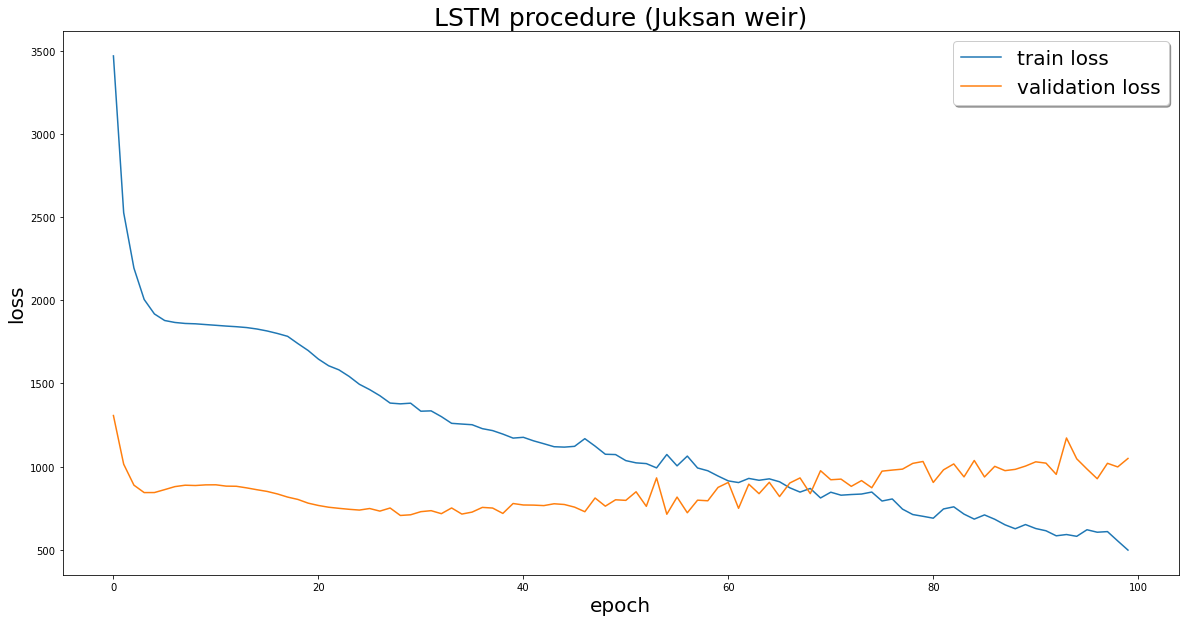

In [37]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), history.history['loss'], label='train loss')
plt.plot(range(100), history.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('LSTM procedure (Juksan weir)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('LSTM JS_python.png')